In [1]:
#https://ieeexplore.ieee.org/document/10549889

In [1]:
!pip install openpyxl ssqueezepy pyts 

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Model, Sequential
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [4]:
import keras.models
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [5]:
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns


def load_file(filepath):
    dataframe = pd.read_csv(filepath, header=None, sep='\s+')
    return dataframe.values



# load a list of files and return as a 3d numpy array
def load_group(filenames, prefix=''):
    loaded = list()
    for name in filenames:
        data = load_file(prefix + name)
        loaded.append(data)
    # stack group so that features are the 3rd dimension
    loaded = np.dstack(loaded)
    return loaded

# load a dataset group, such as train or test
def load_dataset_group(group, prefix=''):
    filepath = prefix + group + '/Inertial Signals/'
    # load all 9 files as a single array
    filenames = list()
    # total acceleration
    filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
    # body acceleration
    filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
    # body gyroscope
    filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
    # load input data
    X = load_group(filenames, filepath)
    # load class output
    y = load_file(prefix + group + '/y_'+group+'.txt')
    return X, y


# load the dataset, returns train and test X and y elements
# load the dataset, returns train and test X and y elements
def load_dataset(prefix=''):
    # load all train
    trainX, trainy = load_dataset_group('train', prefix + 'E:/AI/UCI_HAR/')
    # load all test
    testX, testy = load_dataset_group('test', prefix + 'E:/AI/UCI_HAR/')

    #zero-offset class values
    trainy = trainy - 1
    testy = testy - 1

    trainy_one_hot = to_categorical(trainy)
    testy_one_hot = to_categorical(testy)
    print(trainX.shape, trainy.shape, trainy_one_hot.shape, testX.shape, testy.shape, testy_one_hot.shape)
    return trainX, trainy, trainy_one_hot, testX, testy, testy_one_hot

In [6]:
trainX, trainy, trainy_one_hot, testX, testy, testy_one_hot = load_dataset()

(7352, 128, 9) (7352, 1) (7352, 6) (2947, 128, 9) (2947, 1) (2947, 6)


In [7]:
print("X train shape: ", trainX.shape)
print("Y train shape: ", trainy.shape)
print("Y train One hot shape: ", trainy_one_hot.shape)
print("X test shape: ", testX.shape)
print("Y test shape: ", testy.shape)
print("Y test One hot shape: ", testy_one_hot.shape)

X train shape:  (7352, 128, 9)
Y train shape:  (7352, 1)
Y train One hot shape:  (7352, 6)
X test shape:  (2947, 128, 9)
Y test shape:  (2947, 1)
Y test One hot shape:  (2947, 6)


In [8]:
print("0: Walking:" ,np.where(trainy == 0)[0].size)
print("1: WU:" ,np.where(trainy == 1)[0].size)
print("2: WD:" ,np.where(trainy == 2)[0].size)
print("3: Sitting:" ,np.where(trainy == 3)[0].size)
print("4: Standing:" ,np.where(trainy == 4)[0].size)
print("5: Laying:" ,np.where(trainy == 5)[0].size)

0: Walking: 1226
1: WU: 1073
2: WD: 986
3: Sitting: 1286
4: Standing: 1374
5: Laying: 1407


In [9]:
unique, counts = np.unique(trainy, return_counts=True)
print ("Train data label statistics::")
print (np.asarray((unique, counts)).T)

unique, counts = np.unique(testy, return_counts=True)
print ("Test data label statistics::")
print (np.asarray((unique, counts)).T)

Train data label statistics::
[[   0 1226]
 [   1 1073]
 [   2  986]
 [   3 1286]
 [   4 1374]
 [   5 1407]]
Test data label statistics::
[[  0 496]
 [  1 471]
 [  2 420]
 [  3 491]
 [  4 532]
 [  5 537]]


In [10]:
X_train_all = trainX   # at this stage, the data includes both dynamic and static HAR data
y_train_all = trainy

X_test_all = testX
y_test_all = testy

In [11]:
import random

dynamic_1 = np.where(trainy == 0)[0]
dynamic_2 = np.where(trainy  == 1)[0]
dynamic_3 = np.where(trainy  == 2)[0]
dynamic = np.concatenate([dynamic_1, dynamic_2, dynamic_3])
dynamic_list = dynamic.tolist()

# Shuffle dynamic data index
r = random.random()
random.shuffle(dynamic_list, lambda: r)

dynamic = np.array(dynamic_list)

trainX = X_train_all[dynamic]
trainy = y_train_all[dynamic]

C:\Users\syt07\AppData\Local\Temp\ipykernel_11404\1571964428.py:11: DeprecationWarning: The *random* parameter to shuffle() has been deprecated
since Python 3.9 and will be removed in a subsequent version.
  random.shuffle(dynamic_list, lambda: r)


In [12]:
dynamic_1 = np.where(testy == 0)[0]
dynamic_2 = np.where(testy == 1)[0]
dynamic_3 = np.where(testy == 2)[0]
dynamic = np.concatenate([dynamic_1, dynamic_2, dynamic_3])
dynamic_list = dynamic.tolist()

r = random.random()
random.shuffle(dynamic_list, lambda: r)

dynamic = np.array(dynamic_list)

testX = X_test_all[dynamic]
testy = y_test_all[dynamic]

C:\Users\syt07\AppData\Local\Temp\ipykernel_11404\3566874998.py:8: DeprecationWarning: The *random* parameter to shuffle() has been deprecated
since Python 3.9 and will be removed in a subsequent version.
  random.shuffle(dynamic_list, lambda: r)


In [13]:
unique, counts = np.unique(trainy, return_counts=True)
print ("Train data label statistics::")
print (np.asarray((unique, counts)).T)

unique, counts = np.unique(testy, return_counts=True)
print ("Test data label statistics::")
print (np.asarray((unique, counts)).T)

Train data label statistics::
[[   0 1226]
 [   1 1073]
 [   2  986]]
Test data label statistics::
[[  0 496]
 [  1 471]
 [  2 420]]


In [14]:
trainy_one_hot = to_categorical(trainy)
testy_one_hot = to_categorical(testy)

In [15]:
print("X train shape: ", trainX.shape)
print("Y train shape: ", trainy.shape)
print("Y train One hot shape: ", trainy_one_hot.shape)
print("X test shape: ", testX.shape)
print("Y test shape: ", testy.shape)
print("Y test One hot shape: ", testy_one_hot.shape)

X train shape:  (3285, 128, 9)
Y train shape:  (3285, 1)
Y train One hot shape:  (3285, 3)
X test shape:  (1387, 128, 9)
Y test shape:  (1387, 1)
Y test One hot shape:  (1387, 3)


In [16]:
# trainX, valX, trainy, valy = train_test_split(trainX, trainy,test_size=0.3)

# Standard Scaling

In [16]:
from sklearn.preprocessing import StandardScaler

# Standard Scaling
scaler_std = StandardScaler()

# 데이터 평탄화 후 스케일링
trainX_flat_std = trainX.reshape(-1, 9)
testX_flat_std = testX.reshape(-1, 9)

trainX_std = scaler_std.fit_transform(trainX_flat_std)
testX_std = scaler_std.transform(testX_flat_std)

# 원래 형태로 변환
trainX_std = trainX_std.reshape(3285, 128, 9)
testX_std = testX_std.reshape(1387, 128, 9)

print("Standard Scaled trainX shape:", trainX_std.shape)
print("Standard Scaled testX shape:", testX_std.shape)

Standard Scaled trainX shape: (3285, 128, 9)
Standard Scaled testX shape: (1387, 128, 9)


In [17]:
trainX_transformer = trainX_std.copy()
testX_transformer = testX_std.copy()

In [18]:
# from tensorflow.keras import layers, models
# import tensorflow as tf

# def reshape_to_transformer_input(data):
#     """
#     데이터 형태를 Transformer 입력에 맞게 조정
#     Input: (None, 128, 9)
#     Output: (None, 128, 256)
#     """
#     input_layer = layers.Input(shape=(128, 9))
#     x = layers.Conv1D(filters=256, kernel_size=3, strides=1, padding='same')(input_layer)
#     x = layers.LayerNormalization()(x)
    
#     model = tf.keras.Model(inputs=input_layer, outputs=x)
#     return model(data).numpy()

# # 데이터 변환
# trainX_transformer = reshape_to_transformer_input(trainX_minmax)
# testX_transformer = reshape_to_transformer_input(testX_minmax)

# print("Transformer-ready trainX shape:", trainX_transformer.shape)  # (4067, 128, 256)
# print("Transformer-ready testX shape:", testX_transformer.shape)    # (1560, 128, 256)

# ResNet 입력 형태 변환

In [19]:
# ResNet 입력 형태로 변환
trainX_resnet = trainX_std[..., np.newaxis]  # 마지막 축에 채널 추가
testX_resnet = testX_std[..., np.newaxis]    # 마지막 축에 채널 추가

print("ResNet trainX shape:", trainX_resnet.shape)
print("ResNet testX shape:", testX_resnet.shape)

ResNet trainX shape: (3285, 128, 9, 1)
ResNet testX shape: (1387, 128, 9, 1)


# DOLG Model

In [20]:
import tensorflow as tf
from tensorflow.keras import layers

class GeneralizedMeanPooling2D(layers.Layer):
    def __init__(self, init_norm=3.0, normalize=False, epsilon=1e-4, **kwargs):
        self.init_norm = init_norm
        self.normalize = normalize
        self.epsilon = epsilon
        super(GeneralizedMeanPooling2D, self).__init__(**kwargs)

    def build(self, input_shape):
        self.p = self.add_weight(
            name="norms",
            shape=(input_shape[-1],),
            initializer=tf.keras.initializers.Constant(self.init_norm),
            trainable=True
        )
        super(GeneralizedMeanPooling2D, self).build(input_shape)

    def call(self, inputs):
        x = tf.abs(tf.maximum(self.epsilon, inputs))  # 안정성을 위해 epsilon 추가
        x = tf.pow(x, self.p)  # p승
        x = tf.reduce_mean(x, axis=[1, 2], keepdims=False)  # 평균
        x = tf.pow(x, 1.0 / self.p)  # 1/p 승
        
        if self.normalize:
            x = tf.nn.l2_normalize(x, axis=1)
        
        return x

    def get_config(self):
        config = {
            'init_norm': self.init_norm,
            'normalize': self.normalize,
            'epsilon': self.epsilon
        }
        base_config = super(GeneralizedMeanPooling2D, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))


In [21]:
from tensorflow.keras import layers

def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0.3):
    x = inputs
    for _ in range(4):  # 4개의 Transformer Block 반복
        # Multi-Head Attention
        x_attn = layers.MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(x, x)
        x = layers.Add()([x, x_attn])
        x = layers.LayerNormalization(epsilon=1e-3)(x)
        
        # Feed-Forward Network
        x_ff = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
        x_ff = layers.Dropout(dropout)(x_ff)
        x_ff = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x_ff)
        x = layers.Add()([x, x_ff])
        x = layers.LayerNormalization(epsilon=1e-3)(x)
    
    return x


In [22]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GlobalAveragePooling1D, Dense, Lambda

def build_transformer_model(input_shape):
    inputs = Input(shape=input_shape)
    x = transformer_encoder(inputs, head_size=64, num_heads=4, ff_dim=128, dropout=0.3)
    x = GlobalAveragePooling1D()(x)
    outputs = Dense(128, activation='relu')(x)
    return Model(inputs, outputs, name="TransformerEncoder")


In [23]:
def resnet_block(inputs, filters, kernel_size=3, strides=1):
    x = inputs
    for _ in range(4):  # 4개의 ResNet Block 반복
        shortcut = x
        x = layers.Conv2D(filters, kernel_size, strides=strides, padding='same')(x)
        x = layers.BatchNormalization()(x)
        x = layers.ReLU()(x)
        x = layers.Conv2D(filters, kernel_size, strides=1, padding='same')(x)
        x = layers.BatchNormalization()(x)
        
        if shortcut.shape[-1] != x.shape[-1]:
            shortcut = layers.Conv2D(filters, kernel_size=1, strides=strides, padding='same')(shortcut)
            shortcut = layers.BatchNormalization()(shortcut)
        
        x = layers.Add()([x, shortcut])
        x = layers.ReLU()(x)
    
    return x


In [24]:
def build_resnet_model_with_gem(input_shape):
    inputs = tf.keras.layers.Input(shape=input_shape)
    
    # ResNet Block 반복
    x = resnet_block(inputs, filters=32)
    x = resnet_block(x, filters=64)
    x = resnet_block(x, filters=128)
    x = resnet_block(x, filters=256)
    x = layers.Dropout(0.3)(x)
    
    # GeM 적용
    x = GeneralizedMeanPooling2D()(x)
    
    # Dense Layer 추가
    outputs = layers.Dense(128, activation='relu')(x)
    
    return tf.keras.Model(inputs, outputs, name="ResNetEncoderWithGeM")


In [25]:
class AttentionFusion(layers.Layer):
    def __init__(self, **kwargs):
        super().__init__(name='AttentionFusion', **kwargs)
        self.attention_dense = layers.Dense(1, activation='sigmoid')  # Compute attention weight

    def call(self, inputs):
        local_feat, global_feat = inputs

        # Concatenate features and compute attention weights
        concat_feat = tf.concat([local_feat, global_feat], axis=1)
        attention_weights = self.attention_dense(concat_feat)  # Shape: (batch_size, 1)

        # Weighted sum of local and global features
        fused = attention_weights * local_feat + (1 - attention_weights) * global_feat
        return fused

In [26]:
from tensorflow.keras.layers import Input, Dense, Dropout, Lambda
from tensorflow.keras.models import Model
import tensorflow.keras.backend as K

def build_dolg_model_with_l2_norm(transformer_input_shape, resnet_input_shape, num_classes):
    # 입력 레이어
    transformer_input = Input(shape=transformer_input_shape, name='Transformer_Input')
    resnet_input = Input(shape=resnet_input_shape, name='ResNet_Input')
    
    # Transformer Branch
    transformer_output = build_transformer_model(transformer_input_shape)(transformer_input)
    transformer_output = Lambda(lambda x: K.l2_normalize(x, axis=-1))(transformer_output)
    
    # ResNet Branch
    resnet_output = build_resnet_model_with_gem(resnet_input_shape)(resnet_input)
    resnet_output = Lambda(lambda x: K.l2_normalize(x, axis=-1))(resnet_output)
    
    # Orthogonal Fusion
    fusion_output = AttentionFusion()([transformer_output, resnet_output])
    fusion_output = Dropout(0.3)(fusion_output)
    fusion_output = Dense(128, activation='relu')(fusion_output)
    fusion_output = Lambda(lambda x: K.l2_normalize(x, axis=-1))(fusion_output)
    
    # Classifier
    outputs = Dense(num_classes, activation='softmax')(fusion_output)
    
    # 모델 생성
    model = Model(inputs=[transformer_input, resnet_input], outputs=outputs, name='DOLG_Model_with_L2_Norm')
    return model

In [27]:
import tensorflow as tf

def focal_loss(alpha=0.25, gamma=3.0):
    """
    Focal Loss 함수
    :param alpha: 클래스 가중치 조정 (기본값 0.25)
    :param gamma: 초점 조정 파라미터 (기본값 2.0)
    :return: 손실 값
    """
    def loss_fn(y_true, y_pred):
        # 예측값의 안정성을 보장하기 위해 작은 값 추가
        epsilon = tf.keras.backend.epsilon()
        y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)

        # Cross-Entropy Loss 계산
        ce_loss = -y_true * tf.math.log(y_pred)

        # Focal Loss 추가
        fl_loss = alpha * tf.math.pow(1 - y_pred, gamma) * ce_loss
        return tf.reduce_mean(tf.reduce_sum(fl_loss, axis=-1))
    return loss_fn


In [28]:
# 하이퍼파라미터 설정
num_classes = 3

alpha = [0.32, 0.306, 0.304]  # 클래스별 가중치

# DOLG 모델 구축
dolg_model = build_dolg_model_with_l2_norm((128, 9), (128, 9, 1), num_classes)

# 모델 컴파일
dolg_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3, clipvalue=1.0),
    loss=focal_loss(alpha=alpha, gamma=3.0),
    metrics=['accuracy']
)

# 모델 요약
dolg_model.summary()


Model: "DOLG_Model_with_L2_Norm"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Transformer_Input (InputLayer)  [(None, 128, 9)]    0           []                               
                                                                                                  
 ResNet_Input (InputLayer)      [(None, 128, 9, 1)]  0           []                               
                                                                                                  
 TransformerEncoder (Functional  (None, 128)         51160       ['Transformer_Input[0][0]']      
 )                                                                                                
                                                                                                  
 ResNetEncoderWithGeM (Function  (None, 128)         5968672     ['ResNet_In

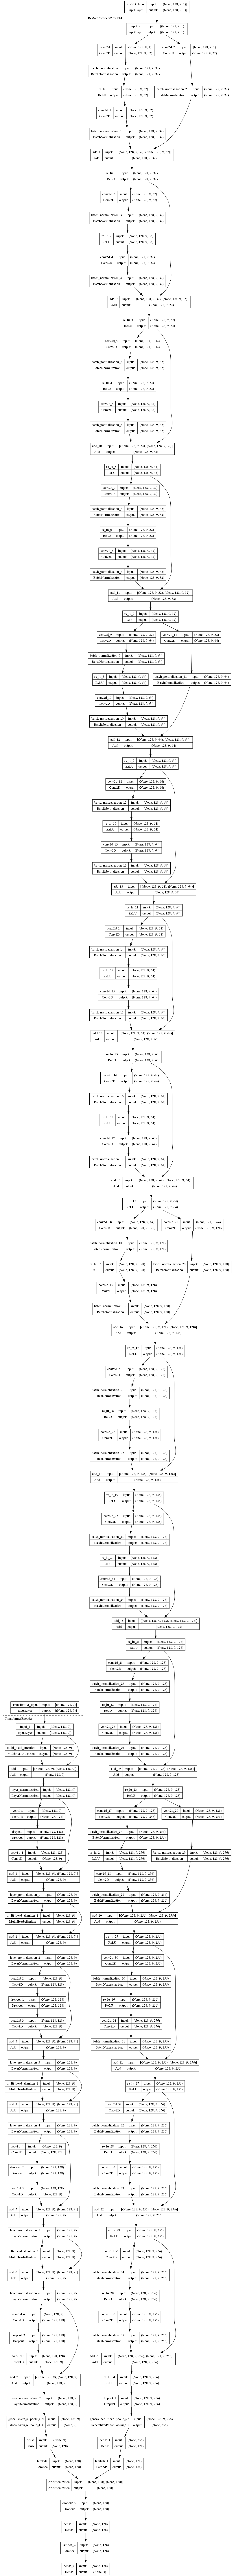

In [29]:
from tensorflow.keras.utils import plot_model

# 모델 시각화
plot_model(
    dolg_model,                   # 학습에 사용된 모델
    to_file="model_plot.png",  # 저장할 파일 이름
    show_shapes=True,         # 각 레이어의 출력 텐서 모양 표시
    show_layer_names=True,    # 레이어 이름 표시
    expand_nested=True,       # 중첩된 모델 (서브모델) 시각화
    dpi=96                    # 해상도 설정
)

In [30]:
trainX_transformer.shape

(3285, 128, 9)

In [31]:
trainX_resnet.shape

(3285, 128, 9, 1)

In [32]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.utils import class_weight
from tensorflow.keras.callbacks import LearningRateScheduler

def lr_schedule(epoch, lr):
    if epoch < 5:
        return lr
    return lr * tf.math.exp(-0.05)  # 지수 감소

lr_scheduler = LearningRateScheduler(lr_schedule)

# ReduceLROnPlateau 설정
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',  # 검증 손실 기준으로 동작
    factor=0.5,          # 학습률 감소 비율 (50% 감소)
    patience = 5,          # 개선되지 않을 경우 5 Epoch 후 학습률 감소
    min_lr=1e-6          # 학습률의 하한선
)

# EarlyStopping 설정
early_stopping = EarlyStopping(
    monitor='val_loss',     # 검증 손실 기준으로 조기 종료
    patience=10,            # 개선되지 않을 경우 10 Epoch 후 종료
    restore_best_weights=True  # 가장 좋은 가중치로 복원
)

# # 클래스 가중치 계산
# class_weights = class_weight.compute_class_weight(
#     class_weight='balanced',
#     classes=np.unique(np.argmax(trainy_one_hot, axis=1)),
#     y=np.argmax(trainy_one_hot, axis=1)
# )

# class_weights = {i: w for i, w in enumerate(class_weights)}
# print("Class Weights:", class_weights)

# 콜백 리스트
callbacks = [early_stopping, reduce_lr, lr_scheduler]

# 모델 학습
history = dolg_model.fit(
    [trainX_transformer, trainX_resnet],  # 입력 데이터
    trainy_one_hot,                       # 레이블
    validation_split=0.25,                # 검증 데이터 비율
    epochs=100,                          # 최대 Epoch 수
    batch_size=12,                       # 배치 사이즈
    callbacks=callbacks,                  # 콜백 리스트 추가
#     class_weight=class_weights
)


Epoch 1/100
206/206 [==============================] - 36s 123ms/step - loss: 0.0325 - accuracy: 0.8648 - val_loss: 0.1021 - val_accuracy: 0.7080 - lr: 0.0010
Epoch 2/100
206/206 [==============================] - 24s 118ms/step - loss: 0.0116 - accuracy: 0.9497 - val_loss: 0.0693 - val_accuracy: 0.7871 - lr: 0.0010
Epoch 3/100
206/206 [==============================] - 24s 118ms/step - loss: 0.0056 - accuracy: 0.9756 - val_loss: 0.0157 - val_accuracy: 0.9161 - lr: 0.0010
Epoch 4/100
206/206 [==============================] - 25s 120ms/step - loss: 0.0025 - accuracy: 0.9907 - val_loss: 0.0037 - val_accuracy: 0.9842 - lr: 0.0010
Epoch 5/100
206/206 [==============================] - 24s 118ms/step - loss: 0.0059 - accuracy: 0.9732 - val_loss: 0.0559 - val_accuracy: 0.7968 - lr: 0.0010
Epoch 6/100
206/206 [==============================] - 24s 118ms/step - loss: 0.0011 - accuracy: 0.9959 - val_loss: 0.0097 - val_accuracy: 0.9197 - lr: 9.5123e-04
Epoch 7/100
206/206 [=====================

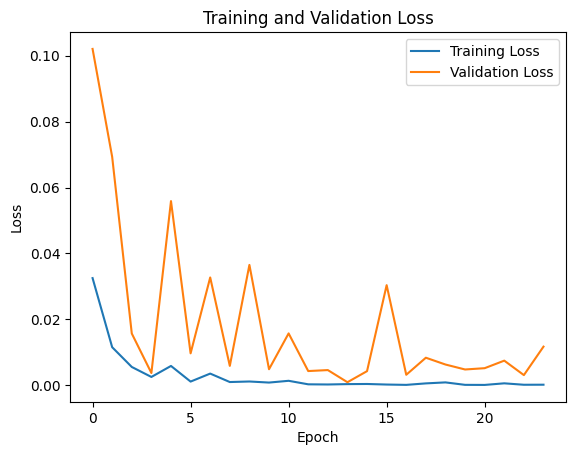

In [33]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

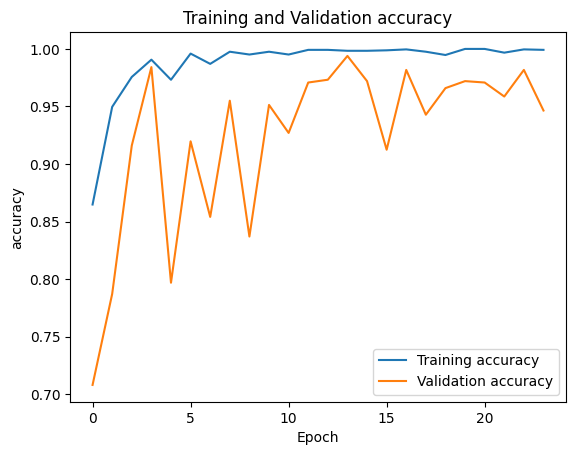

In [34]:
# Plot training and validation loss
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.title('Training and Validation accuracy')
plt.show()

44/44 [==============================] - 5s 84ms/step
Classification Report:
              precision    recall  f1-score   support

     SITTING       0.92      1.00      0.96       496
    STANDING       1.00      0.90      0.95       471
      LAYING       0.95      0.95      0.95       420

    accuracy                           0.95      1387
   macro avg       0.96      0.95      0.95      1387
weighted avg       0.96      0.95      0.95      1387

Test Accuracy: 0.95


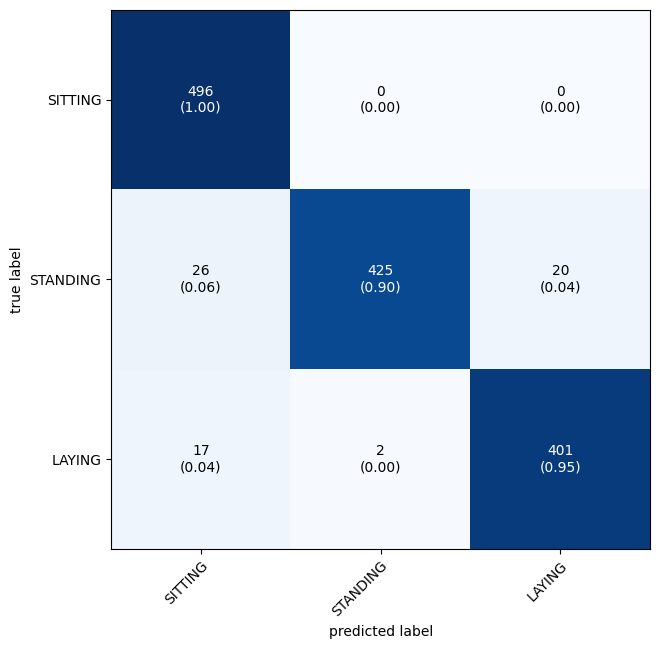

In [35]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np

# 예측 수행
predy = dolg_model.predict([testX_transformer, testX_resnet])
predy = np.argmax(predy, axis=-1)  # 가장 확률이 높은 클래스를 선택

# 테스트 라벨 (One-Hot Encoding → 정수형 라벨 변환)
testy = np.argmax(testy_one_hot, axis=-1)  # 테스트 레이블 변환

# 라벨 정의
LABELS = ['SITTING', 'STANDING', 'LAYING']

# 혼동 행렬 생성
cm = confusion_matrix(testy, predy)

# 혼동 행렬 시각화
plot_confusion_matrix(conf_mat=cm, class_names=LABELS, show_normed=True, figsize=(7,7))

# 성능 보고서 출력
print("Classification Report:")
print(classification_report(testy, predy, target_names=LABELS))

# 정확도 출력
accuracy = accuracy_score(testy, predy)
print(f"Test Accuracy: {accuracy:.2f}")


In [36]:
from sklearn.metrics import precision_score, recall_score, f1_score

print(cm)
print(accuracy_score(testy,predy))
print(f1_score(testy,predy, average='weighted'))
print(classification_report(testy,predy))

[[496   0   0]
 [ 26 425  20]
 [ 17   2 401]]
0.9531362653208363
0.9529491541814076
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       496
           1       1.00      0.90      0.95       471
           2       0.95      0.95      0.95       420

    accuracy                           0.95      1387
   macro avg       0.96      0.95      0.95      1387
weighted avg       0.96      0.95      0.95      1387

